In [586]:
import numpy as np
import pandas as pd

import pymc3 as pm

import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [587]:
# Define dimension.
d = 1

# Number of samples. 
n = 1000

x = np.linspace(start=0, stop=1, num=n)

# Error standar deviation. 
sigma_n = 0.2

# Errors.
epsilon = np.random.normal(loc=0, scale=sigma_n, size=n)

f = np.sin((2*np.pi)*x)

# Observer target variable. 
y = f + epsilon

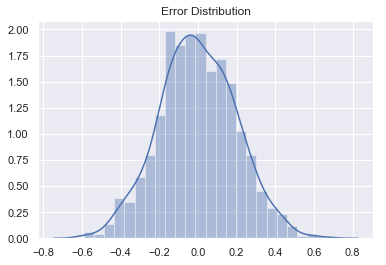

In [588]:
sns.distplot(epsilon).set_title("Error Distribution");

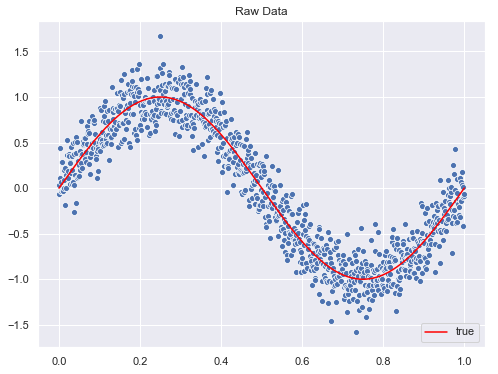

In [589]:
fig, ax = plt.subplots(figsize=(8,6))
# Plot raw data.
sns.scatterplot(x=x, y=y);
# Plot "true" linear fit.
sns.lineplot(x=x, y=f, color="red", label = "true");

ax.legend(loc="lower right")
ax.set_title("Raw Data");

In [590]:
n_star = 10

x_star = np.linspace(start=0, stop=1, num=n_star)

In [591]:
def kernel_function(x, y):
    
    c = np.exp(- (1/2) * (np.linalg.norm(x - y)**2))
    
    return c

In [592]:
K = np.eye(n)

for i in range(0, n):
    
    for j in range(0, n):
        
        K[i, j] = kernel_function(x[i], x[j]) + (sigma_n**2)*int(i == j)

In [593]:
K.shape

(1000, 1000)

In [594]:
K_star2 = np.eye(n_star)

for i in range(0, n_star):
    
    for j in range(0, n_star):
        
        K_star2[i, j] = kernel_function(x_star[i], x_star[j])

In [595]:
K_star2.shape

(10, 10)

In [596]:
K_star = np.zeros(n*n_star).reshape([n_star, n])

for i in range(0, n_star):
    
    for j in range(0, n):
        
        K_star[i, j] = kernel_function(x_star[i], x[j])

In [597]:
K_star.shape

(10, 1000)

In [598]:
a = np.concatenate((K, K_star), axis=0)
a.shape

(1010, 1000)

In [599]:
b = np.concatenate((K_star.T, K_star2), axis=0)
b.shape

(1010, 10)

In [600]:
C = np.concatenate((a, b), axis=1)
C.shape

(1010, 1010)

In [601]:
(C.T == C).all()

True

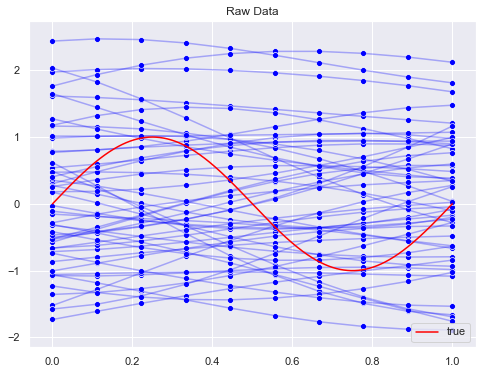

In [602]:
fig, ax = plt.subplots(figsize=(8,6))
# Plot raw data.

for i in range(0, 50):
    
    z_star = np.random.multivariate_normal(mean=np.zeros(n_star), cov=K_star2)

    sns.scatterplot(x=x_star, y=z_star, color="blue");
    sns.lineplot(x=x_star, y=z_star, color="blue", alpha=0.3);
    
# Plot "true" linear fit.
sns.lineplot(x=x.T.reshape(n,), y=f.reshape(n,), color="red", label = "true");

ax.legend(loc="lower right")
ax.set_title("Raw Data");

In [603]:
f_bar_star = np.dot(K_star, np.dot(np.linalg.inv(K), y.reshape([n, d])))

In [604]:
cov_f_star = K_star2 - np.dot(K_star, np.dot(np.linalg.inv(K), K_star.T))

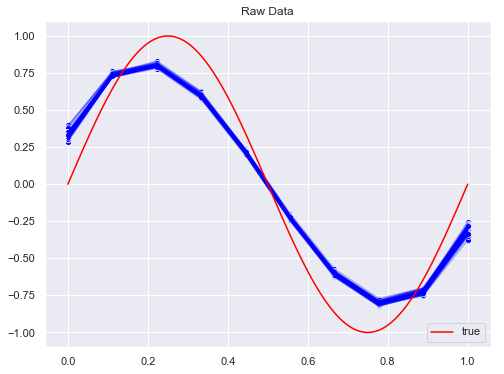

In [605]:
fig, ax = plt.subplots(figsize=(8,6))
# Plot raw data.

for i in range(0, 50):
    
    z_star = np.random.multivariate_normal(mean=f_bar_star.squeeze(), cov=cov_f_star)

    sns.scatterplot(x=x_star, y=z_star, color="blue");
    sns.lineplot(x=x_star, y=z_star, color="blue", alpha=0.3);

# Plot "true" linear fit.
sns.lineplot(x=x, y=f, color="red", label = "true");

ax.legend(loc="lower right")
ax.set_title("Raw Data");